### Import Data and Exploration

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from pandas_profiling import ProfileReport
import os
import sys

In [2]:
# Setting the working path

os.chdir('../') # remove the last directory
path = os.getcwd()
print(path)

/home/joao_victor/netflix-recommendation-app


In [3]:
df_credits = pd.read_csv(path + '/data/input/credits.csv')
df_credits.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [4]:
df_titles = pd.read_csv(path + '/data/input/titles.csv')
df_titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [5]:
# Aggregate name column by movie id separeting by comma

df_credits_agg = df_credits.groupby('id')['name'].agg(','.join).to_frame().reset_index()
df_credits_agg

,id,name
0,tm1000037,"Luna Wedler,Jannis Niewöhner,Milan Peschel,Edi..."
1,tm1000147,"Guy Pearce,Matilda Anna Ingrid Lutz,Travis Fim..."
2,tm1000166,"Glenn Fredly,Marcello Tahitoe,Andien Aisyah,Ca..."
3,tm1000185,"Adrianna Chlebicka,Mateusz Banasiuk,Mirosław B..."
4,tm100027,"Dharmendra,Hema Malini,Zeenat Aman,Prem Chopra..."
...,...,...
5429,ts97584,"Sebastian Perry,William Mitchell"
5430,ts9794,Jerry Seinfeld
5431,ts98252,"Tom McGrath,John DiMaggio,David Schwimmer,Andy..."
5432,ts98316,John Hurt


In [6]:
# Validate the aggregation

df_credits.loc[df_credits['id'] == 'ts9794']

,person_id,id,name,character,role
15336,32954,ts9794,Jerry Seinfeld,Self - Host,ACTOR


In [7]:
# Merge df_titles in df_credits (just column actors name)

df_merged_titles = pd.merge(df_titles, df_credits_agg, left_on = "id", right_on = "id")
df_merged_titles

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,name
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,"Robert De Niro,Jodie Foster,Albert Brooks,Harv..."
1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8,"Graham Chapman,John Cleese,Eric Idle,Terry Gil..."
2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8,"Graham Chapman,John Cleese,Terry Gilliam,Eric ..."
3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7,"Ellen Burstyn,Linda Blair,Max von Sydow,Lee J...."
4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0,12.919,8.3,"Graham Chapman,Michael Palin,Terry Jones,Eric ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,NaN,108,['comedy'],['PH'],NaN,tt14412240,5.8,26.0,4.112,NaN,"Jolina Magdangal,Melai Cantiveros,Karla Estrad..."
5430,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0,0.966,NaN,"Richard Mofe-Damijo,Ego Nwosu,Keppy Ekpenyong-..."
5431,tm1108171,Edis Starlight,MOVIE,Rising star Edis's career journey with ups and...,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN,1.036,8.5,"Edis Görgülü,Kürşad Bayhan"
5432,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0,0.709,NaN,"Omoni Oboli,Stephanie Okereke-Linus,Merlisa La..."


## Nulls Handling

In [8]:

#checking for 'null' values
df_merged_titles.isnull().sum().sort_values(ascending=False) 

seasons                 3658
age_certification       2483
imdb_votes               485
imdb_score               471
imdb_id                  410
tmdb_score               175
description               10
tmdb_popularity            2
title                      1
id                         0
type                       0
release_year               0
runtime                    0
genres                     0
production_countries       0
name                       0
dtype: int64

In [9]:
df_merged_titles.loc[df_merged_titles['type']=='MOVIE']['seasons'].unique()

array([nan])

In [10]:
df_merged_titles['seasons'].fillna(0, inplace=True)
df_merged_titles

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,name
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],0.0,tt0075314,8.3,795222.0,27.612,8.2,"Robert De Niro,Jodie Foster,Albert Brooks,Harv..."
1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],0.0,tt0071853,8.2,530877.0,18.216,7.8,"Graham Chapman,John Cleese,Eric Idle,Terry Gil..."
2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],0.0,tt0079470,8.0,392419.0,17.505,7.8,"Graham Chapman,John Cleese,Terry Gilliam,Eric ..."
3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],0.0,tt0070047,8.1,391942.0,95.337,7.7,"Ellen Burstyn,Linda Blair,Max von Sydow,Lee J...."
4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0,12.919,8.3,"Graham Chapman,Michael Palin,Terry Jones,Eric ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,NaN,108,['comedy'],['PH'],0.0,tt14412240,5.8,26.0,4.112,NaN,"Jolina Magdangal,Melai Cantiveros,Karla Estrad..."
5430,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],0.0,tt13857480,6.9,39.0,0.966,NaN,"Richard Mofe-Damijo,Ego Nwosu,Keppy Ekpenyong-..."
5431,tm1108171,Edis Starlight,MOVIE,Rising star Edis's career journey with ups and...,2021,NaN,74,"['music', 'documentation']",[],0.0,NaN,NaN,NaN,1.036,8.5,"Edis Görgülü,Kürşad Bayhan"
5432,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",0.0,tt14620732,6.5,32.0,0.709,NaN,"Omoni Oboli,Stephanie Okereke-Linus,Merlisa La..."


In [11]:
df_merged_titles['age_certification'].fillna('no_certification', inplace=True)
df_merged_titles

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,name
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],0.0,tt0075314,8.3,795222.0,27.612,8.2,"Robert De Niro,Jodie Foster,Albert Brooks,Harv..."
1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],0.0,tt0071853,8.2,530877.0,18.216,7.8,"Graham Chapman,John Cleese,Eric Idle,Terry Gil..."
2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],0.0,tt0079470,8.0,392419.0,17.505,7.8,"Graham Chapman,John Cleese,Terry Gilliam,Eric ..."
3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],0.0,tt0070047,8.1,391942.0,95.337,7.7,"Ellen Burstyn,Linda Blair,Max von Sydow,Lee J...."
4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0,12.919,8.3,"Graham Chapman,Michael Palin,Terry Jones,Eric ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,no_certification,108,['comedy'],['PH'],0.0,tt14412240,5.8,26.0,4.112,NaN,"Jolina Magdangal,Melai Cantiveros,Karla Estrad..."
5430,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,no_certification,100,"['romance', 'drama']",['NG'],0.0,tt13857480,6.9,39.0,0.966,NaN,"Richard Mofe-Damijo,Ego Nwosu,Keppy Ekpenyong-..."
5431,tm1108171,Edis Starlight,MOVIE,Rising star Edis's career journey with ups and...,2021,no_certification,74,"['music', 'documentation']",[],0.0,NaN,NaN,NaN,1.036,8.5,"Edis Görgülü,Kürşad Bayhan"
5432,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,no_certification,88,"['family', 'drama']","['NG', 'CA']",0.0,tt14620732,6.5,32.0,0.709,NaN,"Omoni Oboli,Stephanie Okereke-Linus,Merlisa La..."


In [12]:
#There are movies without imbd_id but with a in tmdb records
df_merged_titles.loc[df_merged_titles['imdb_id'].isnull()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,name
31,tm97793,Lock Your Girls In,MOVIE,Dr. Raafat faces challenges and difficulties i...,1980,no_certification,230,['comedy'],['EG'],0.0,NaN,NaN,NaN,2.313,8.0,"Fouad El-Mohandes,Sanaa Younes,Sherihan,Ijlal ..."
32,tm85426,The Witness Who Didn't See Anything,MOVIE,"An Egyptian comedy play about an innocent, clu...",1976,no_certification,217,['comedy'],['EG'],0.0,NaN,NaN,NaN,2.612,7.7,"Adel Emam,Omar El-Hariri,Nazim Sharawy,Shawqy ..."
33,tm188894,The School of Mischief,MOVIE,This play is about a female teacher and how sh...,1973,no_certification,251,['comedy'],['EG'],0.0,NaN,NaN,NaN,3.381,8.5,"Adel Emam,Saeed Saleh,Ahmad Zaki,Younes Shalab..."
90,tm126791,The Married Couples,MOVIE,The story revolves around the problems of marr...,1981,no_certification,194,['drama'],['EG'],0.0,NaN,NaN,NaN,1.532,9.2,"Samir Ghanem,Sherine,George Sedhom,Rawia Saaee..."
91,tm186777,Sayed The Servant,MOVIE,Adel Imam plays the role of educated person wh...,1985,no_certification,166,['comedy'],['EG'],0.0,NaN,NaN,NaN,4.494,7.6,"Adel Emam,Ragaa Al-Giddawy,Omar El-Hariri,Must..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5392,tm1040959,The Circle: The Afterparty,MOVIE,Stars of The Circle drop by to discuss Season ...,2021,no_certification,35,[],[],0.0,NaN,NaN,NaN,2.449,10.0,"David Spade,Fortune Feimster,London Hughes"
5398,tm997617,Love or Money,MOVIE,Exploration into the tense relationship of suc...,2021,no_certification,116,['comedy'],['PH'],0.0,NaN,NaN,NaN,1.496,NaN,"Angelica Panganiban,Coco Martin,Gelli De Belen..."
5403,tm1047429,Alan Saldaña: Locked Up,MOVIE,"Mexican comedian Alan Saldaña is back, poking ...",2021,no_certification,49,['comedy'],[],0.0,NaN,NaN,NaN,11.666,6.0,Alan Saldaña
5425,ts297061,Masameer County,SHOW,"A humorous view of a changing Saudi Arabia, as...",2021,TV-MA,23,[],['SA'],1.0,NaN,NaN,NaN,0.959,8.0,"Malik Nejer,Abdulaziz Alshehri,Mazroa Al-Mazro..."


In [26]:
# 'tmdb_score' 'imdb_score' are on the same number scale, thus we can create a column for universal score. using tmdb score whenever there is no imdb score
df_merged_titles[['tmdb_score', 'imdb_score']].isnull().sum()

tmdb_score    0
imdb_score    0
dtype: int64

In [18]:
#use fillna to change null values for the column average value
df_merged_titles.describe()
#df_merged_titles['tmdb_score'].fillna(df_merged_titles['tmdb_score'].mean(), inplace=True)

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5434.000000,5434.000000,5434.000000,4963.000000,4.949000e+03,5432.000000,5259.000000
mean,2015.929886,79.869157,0.730217,6.527866,2.467555e+04,23.344596,6.792508
std,7.410901,38.979547,1.894051,1.152695,8.939307e+04,70.413535,1.138112
min,1953.000000,0.000000,0.000000,1.500000,5.000000e+00,0.600000,1.000000
25%,2015.000000,46.000000,0.000000,5.800000,6.100000e+02,3.329500,6.100000
50%,2018.000000,87.000000,0.000000,6.600000,2.592000e+03,7.855500,6.900000
75%,2020.000000,106.000000,1.000000,7.350000,1.132900e+04,18.554750,7.500000
max,2022.000000,251.000000,42.000000,9.500000,2.268288e+06,1823.374000,10.000000


In [25]:
def null_for_mean(df:pd.DataFrame, columns:list) -> pd.DataFrame: 
    """
    Substitute null values for the specified column mean. 

    Args:
        df (pd.DataFrame): Pandas Dataframe
        columns (list): column(s) for transformation

    Returns:
        pd.DataFrame: Pandas Dataframe
    """
    for i in columns:
        df[i].fillna(df[i].mean(), inplace = True)
    return df 

null_for_mean(df_merged_titles, ['imdb_score', 'tmdb_score'])

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,name
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],0.0,tt0075314,8.300000,795222.0,27.612,8.200000,"Robert De Niro,Jodie Foster,Albert Brooks,Harv..."
1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],0.0,tt0071853,8.200000,530877.0,18.216,7.800000,"Graham Chapman,John Cleese,Eric Idle,Terry Gil..."
2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],0.0,tt0079470,8.000000,392419.0,17.505,7.800000,"Graham Chapman,John Cleese,Terry Gilliam,Eric ..."
3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],0.0,tt0070047,8.100000,391942.0,95.337,7.700000,"Ellen Burstyn,Linda Blair,Max von Sydow,Lee J...."
4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.800000,72895.0,12.919,8.300000,"Graham Chapman,Michael Palin,Terry Jones,Eric ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,no_certification,108,['comedy'],['PH'],0.0,tt14412240,5.800000,26.0,4.112,6.792508,"Jolina Magdangal,Melai Cantiveros,Karla Estrad..."
5430,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,no_certification,100,"['romance', 'drama']",['NG'],0.0,tt13857480,6.900000,39.0,0.966,6.792508,"Richard Mofe-Damijo,Ego Nwosu,Keppy Ekpenyong-..."
5431,tm1108171,Edis Starlight,MOVIE,Rising star Edis's career journey with ups and...,2021,no_certification,74,"['music', 'documentation']",[],0.0,NaN,6.527866,NaN,1.036,8.500000,"Edis Görgülü,Kürşad Bayhan"
5432,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,no_certification,88,"['family', 'drama']","['NG', 'CA']",0.0,tt14620732,6.500000,32.0,0.709,6.792508,"Omoni Oboli,Stephanie Okereke-Linus,Merlisa La..."


In [27]:
# Validate change of null replace to mean
df_merged_titles[['tmdb_score', 'imdb_score']].isnull().sum()

tmdb_score    0
imdb_score    0
dtype: int64

In [28]:
df_merged_titles[['tmdb_score', 'imdb_score']].describe()

,tmdb_score,imdb_score
count,5434.000000,5434.000000
mean,6.792508,6.527866
std,1.119633,1.101597
min,1.000000,1.500000
25%,6.100000,5.900000
50%,6.800000,6.527866
75%,7.500000,7.300000
max,10.000000,9.500000


In [31]:
df_merged_titles.loc[df_merged_titles['imdb_votes'].isnull()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,name
31,tm97793,Lock Your Girls In,MOVIE,Dr. Raafat faces challenges and difficulties i...,1980,no_certification,230,['comedy'],['EG'],0.0,NaN,6.527866,NaN,2.313,8.0,"Fouad El-Mohandes,Sanaa Younes,Sherihan,Ijlal ..."
32,tm85426,The Witness Who Didn't See Anything,MOVIE,"An Egyptian comedy play about an innocent, clu...",1976,no_certification,217,['comedy'],['EG'],0.0,NaN,6.527866,NaN,2.612,7.7,"Adel Emam,Omar El-Hariri,Nazim Sharawy,Shawqy ..."
33,tm188894,The School of Mischief,MOVIE,This play is about a female teacher and how sh...,1973,no_certification,251,['comedy'],['EG'],0.0,NaN,6.527866,NaN,3.381,8.5,"Adel Emam,Saeed Saleh,Ahmad Zaki,Younes Shalab..."
90,tm126791,The Married Couples,MOVIE,The story revolves around the problems of marr...,1981,no_certification,194,['drama'],['EG'],0.0,NaN,6.527866,NaN,1.532,9.2,"Samir Ghanem,Sherine,George Sedhom,Rawia Saaee..."
91,tm186777,Sayed The Servant,MOVIE,Adel Imam plays the role of educated person wh...,1985,no_certification,166,['comedy'],['EG'],0.0,NaN,6.527866,NaN,4.494,7.6,"Adel Emam,Ragaa Al-Giddawy,Omar El-Hariri,Must..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5402,ts345779,Barbie: It Takes Two,SHOW,"Barbie ""Malibu"" Roberts and Barbie ""Brooklyn"" ...",2022,TV-Y,22,[],['US'],1.0,tt19178656,6.527866,NaN,5.321,10.0,"America Young,Tatiana Varria,Nicolas Roye"
5403,tm1047429,Alan Saldaña: Locked Up,MOVIE,"Mexican comedian Alan Saldaña is back, poking ...",2021,no_certification,49,['comedy'],[],0.0,NaN,6.527866,NaN,11.666,6.0,Alan Saldaña
5412,tm1094060,My Heroes Were Cowboys,MOVIE,Robin Wiltshire's painful childhood was rescue...,2021,PG,23,['documentation'],['US'],0.0,tt15084326,6.527866,NaN,3.688,7.7,"Robin Wiltshire,Tyler Greco"
5425,ts297061,Masameer County,SHOW,"A humorous view of a changing Saudi Arabia, as...",2021,TV-MA,23,[],['SA'],1.0,NaN,6.527866,NaN,0.959,8.0,"Malik Nejer,Abdulaziz Alshehri,Mazroa Al-Mazro..."


In [33]:
df_merged_titles['imdb_votes'].mean()
df_merged_titles['imdb_votes'].median()

2592.0

In [ ]:
df_merged_titles['imdb_votes'].mode()

<AxesSubplot:xlabel='imdb_votes'>

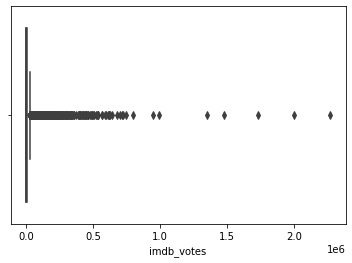

In [38]:
sns.boxplot(x = 'imdb_votes', data = df_merged_titles)